# Insurance Claims- Fraud Detection

## Data Description

Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, we are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

In this dataset we are working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 

This dataset contains the data like months_as_customer, age,	policy_number, policy_bind_date, policy_state, policy_csl,	policy_deductable,	policy_annual_premium,	umbrella_limit,	insured_zip	,insured_sex,	insured_education_level,	insured_occupation,	insured_hobbies,	insured_relationship,	capital-gains,	capital-loss,	incident_date,	incident_type,	collision_type,	incident_severity,	authorities_contacted,	incident_state,	incident_city,	incident_location,	incident_hour_of_the_day,	number_of_vehicles_involved,	property_damage	bodily_injuries,	witnesses,	police_report_available,	total_claim_amount,	injury_claim,	property_claim,	vehicle_claim,	auto_make,	auto_model,	auto_year,	fraud_reported,	_c39

Our target is to predict the Fraud reported.

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

import warnings
warnings.filterwarnings('ignore')



## Importing the Dataset

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv')
pd.set_option('display.max_columns',None)
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [3]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [4]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [6]:
#Dimension of the dataset
df.shape

(1000, 40)

In [7]:
#Statistical history
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


In [8]:
#Checking the null values of the dataset
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

Null values are present in the column _c39.

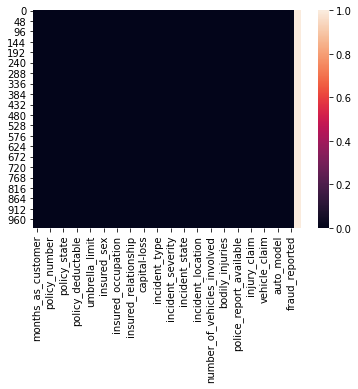

In [9]:
sns.heatmap(df.isnull())

In [10]:
# we are going to drop the column _c39
df.drop('_c39',axis=1,inplace=True)

In [11]:
df.head(5)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [12]:
column_name=[]
unique_value=[]

for colm in df:
    if df[colm].dtype=='object':
        column_name.append(str(colm))
        unique_value.append(df[colm].nunique())
table=pd.DataFrame()
table['Colm_name']=column_name
table['Value']=unique_value

table=table.sort_values('Value',ascending=False)
table      

,Colm_name,Value
15,incident_location,1000
0,policy_bind_date,951
8,incident_date,60
19,auto_model,39
6,insured_hobbies,20
18,auto_make,14
5,insured_occupation,14
4,insured_education_level,7
14,incident_city,7
13,incident_state,7


In [13]:
#droping the columns based on above result
df.drop(['incident_location','policy_bind_date','incident_date','auto_model','policy_number'],axis=1,inplace=True)

In [14]:
df

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_year,fraud_reported
0,328,48,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,2004,Y
1,228,42,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,8,1,?,0,0,?,5070,780,780,3510,Mercedes,2007,Y
2,134,29,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,2007,N
3,256,41,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,2014,Y
4,228,44,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,Vehicle Theft,?,Minor Damage,None,NY,Arlington,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,OH,500/1000,1000,1310.80,0,431289,FEMALE,Masters,craft-repair,paintball,unmarried,0,0,Single Vehicle Collision,Front Collision,Minor Damage,Fire,NC,Northbrook,20,1,YES,0,1,?,87200,17440,8720,61040,Honda,2006,N
996,285,41,IL,100/300,1000,1436.79,0,608177,FEMALE,PhD,prof-specialty,sleeping,wife,70900,0,Single Vehicle Collision,Rear Collision,Major Damage,Fire,SC,Northbend,23,1,YES,2,3,?,108480,18080,18080,72320,Volkswagen,2015,N
997,130,34,OH,250/500,500,1383.49,3000000,442797,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,35100,0,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NC,Arlington,4,3,?,2,3,YES,67500,7500,7500,52500,Suburu,1996,N
998,458,62,IL,500/1000,2000,1356.92,5000000,441714,MALE,Associate,handlers-cleaners,base-jumping,wife,0,0,Single Vehicle Collision,Rear Collision,Major Damage,Other,NY,Arlington,2,1,?,0,1,YES,46980,5220,5220,36540,Audi,1998,N


## EDA

In [15]:
df=df.replace('?',np.nan)

In [16]:
df.isnull().sum()

months_as_customer               0
age                              0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries                  0
witnesses                        0
police_report_available        343
total_claim_amount               0
injury_claim        

In [17]:
#treating missing values
#We are going to replace the nan values by most common type.ie, mode value
df['collision_type'].fillna(df['collision_type'].mode()[0],inplace=True)

#Going to treat nan values as No in the case of police_report_available and property_damage

df['police_report_available'].fillna('NO',inplace=True)

df['property_damage'].fillna('NO',inplace=True)

## Data Visualization

### Univariate Analysis

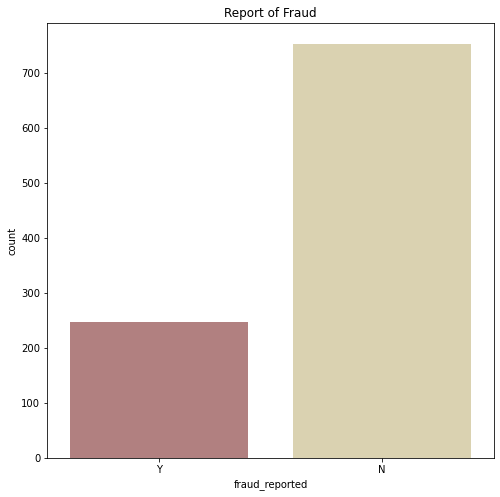

In [18]:
plt.figure(figsize=(8,8))
sns.countplot(df['fraud_reported'],palette='pink')
plt.title("Report of Fraud")
plt.show()

* Most of the customers are not fraud.

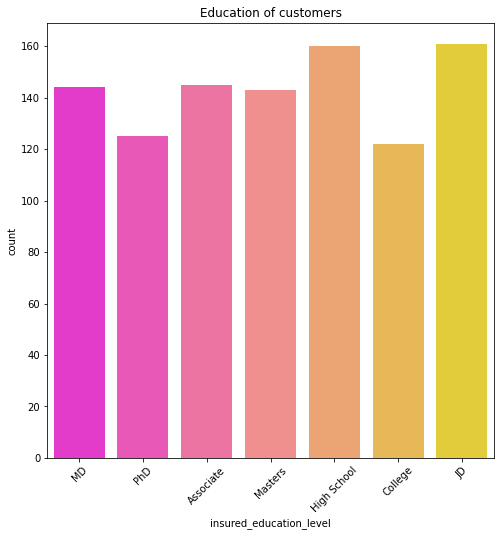

In [19]:
plt.figure(figsize=(8,8))
plt.xticks(rotation=45)
sns.countplot(df['insured_education_level'],palette='spring')
plt.title('Education of customers')
plt.show()

* Most of the customers are having Masters and JD

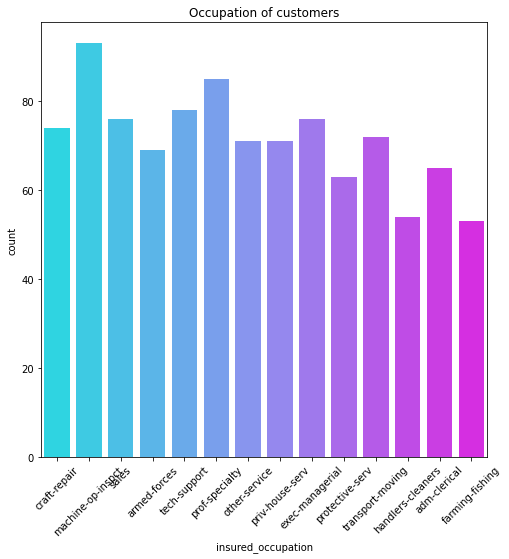

In [20]:
plt.figure(figsize=(8,8))
plt.xticks(rotation=45)
sns.countplot(df['insured_occupation'],palette='cool')
plt.title('Occupation of customers')
plt.show()

* Most of the customers works in machine-op-inspect-sales

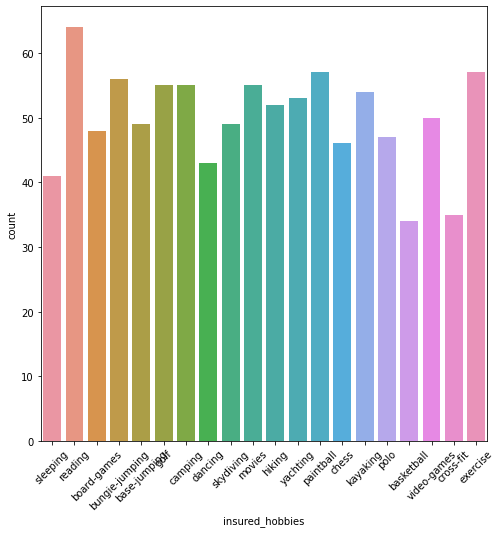

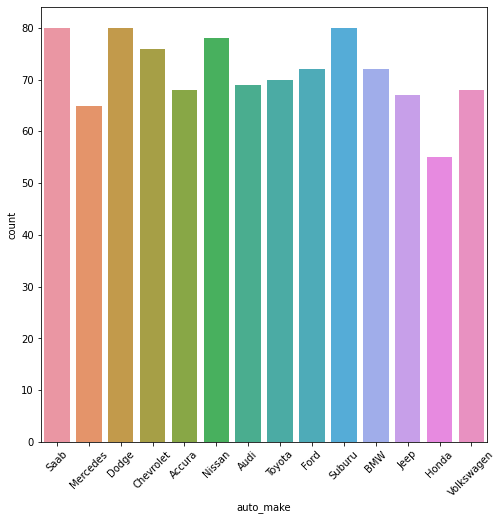

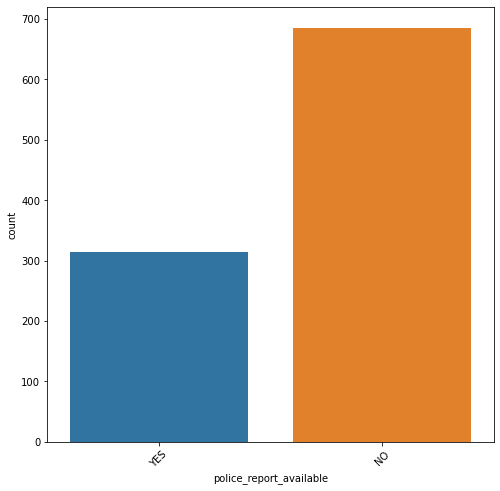

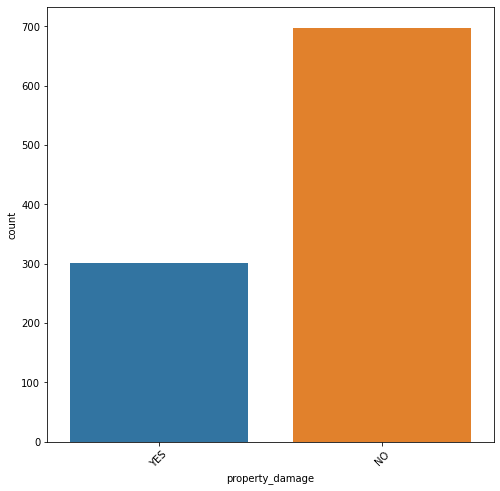

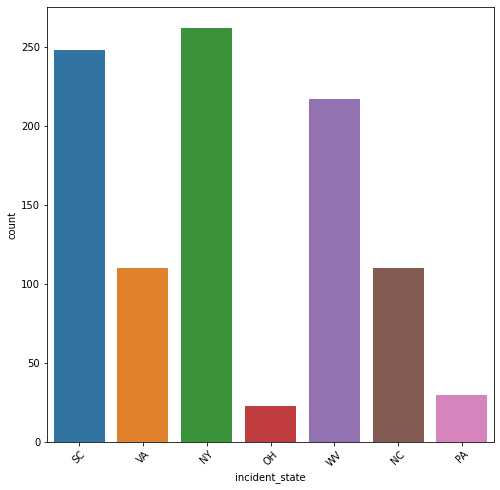

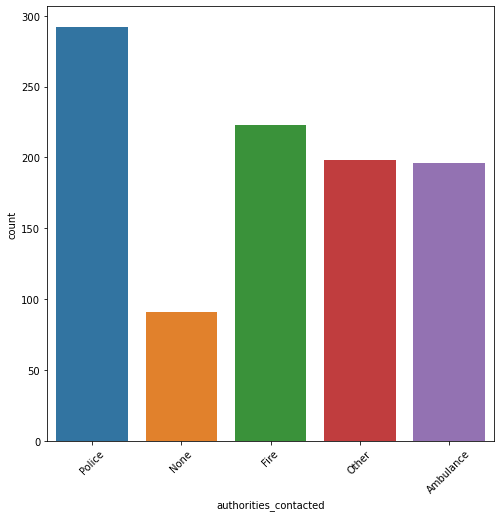

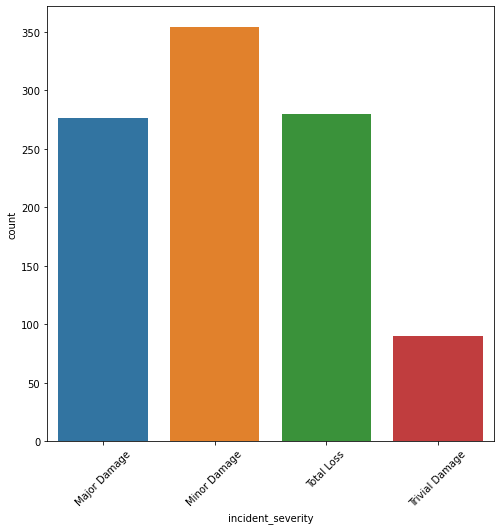

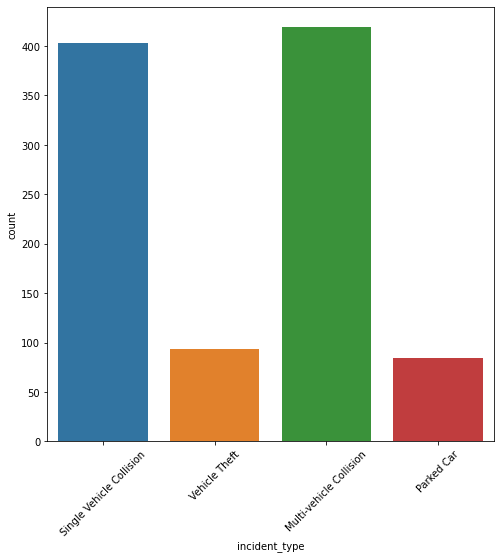

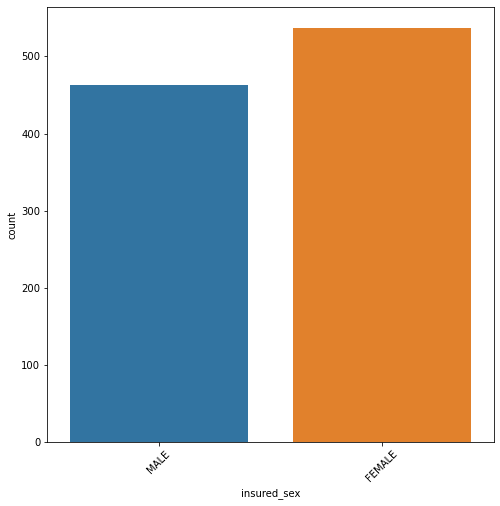

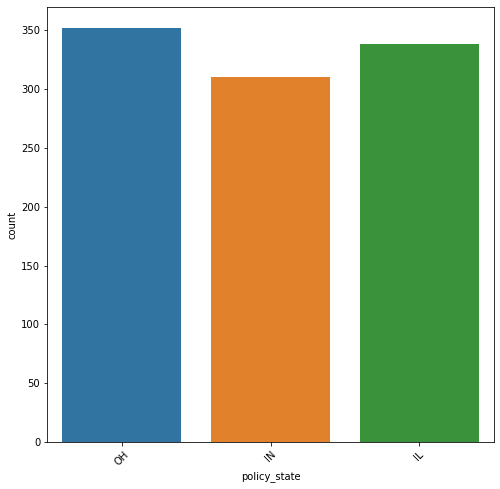

In [21]:
var1=['insured_hobbies','auto_make','police_report_available','property_damage','incident_state','authorities_contacted','incident_severity','incident_type','insured_sex','policy_state']
for i in var1:
    plt.figure(figsize=(8,8))
    plt.xticks(rotation=45)
    sns.countplot(df[i])
    plt.show()

#### Observations:

* Most of the customer's hobbies are reading.


* Most of the customers having auto models Saab,Dodge and Suburu.


* Most of the customers are not fraud.


* For most of the cases police report is not available.


* For most cases property damage is not happened.


* Incident is maximum in the state "NY" and minimum in the state "OH".


* For most of the cases authorities contacted "police".for second most cases authorities contacted "Fire". customers not contacted any authorities for minimum number of cases.


* for most of the cases only "Minor damage" is happened.For second most cases "Total Loss" is happened.


* for most of the cases "multi vehicle collision" is happened.For second most cases type of incident is "single vehicle collision".


* Most of the customers who made insurance claim are "Females".Male customers are less in number.

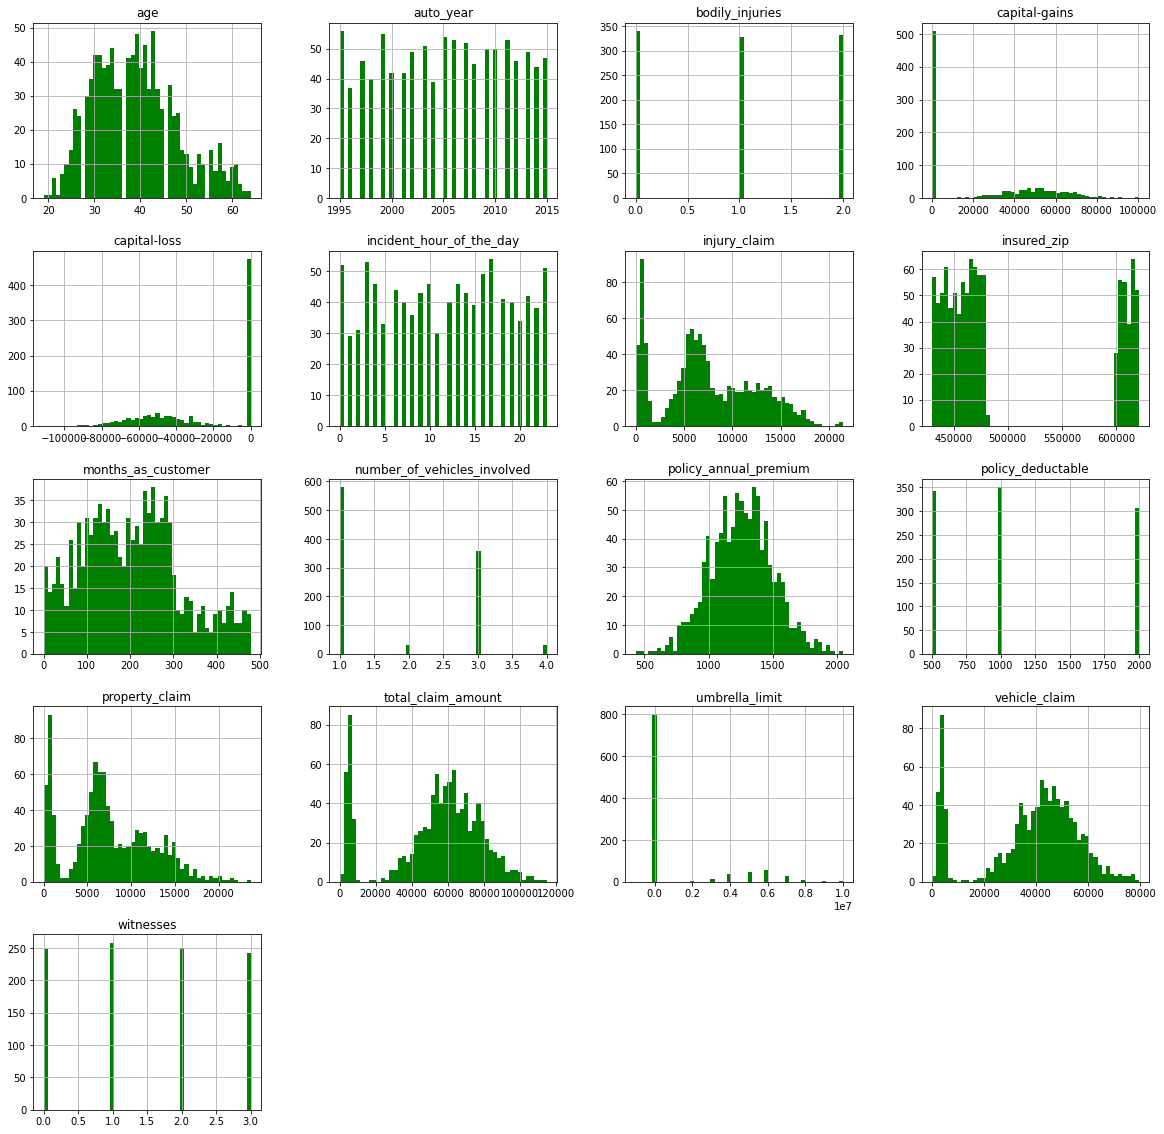

In [22]:
#Univariate Analysis(Numerical features)
df.hist(bins=50,figsize=(20,20),color='g')
plt.show()

* Most of customer's age who made claim are between 30 to 50.


* Most of the customers have 0 capital gain or 0 capital loss.


* Most of the customer's premium is between 1000 to 1500


### Bivariate Analysis

In [23]:
def plotcountgraph(var1):
    
    sns.set(font_scale=1)
    plt.figure(figsize=(10,8))
    ax=sns.countplot(x=var1,hue='fraud_reported',data=df)
    plt.setp(ax.get_xticklabels(),rotation=90)

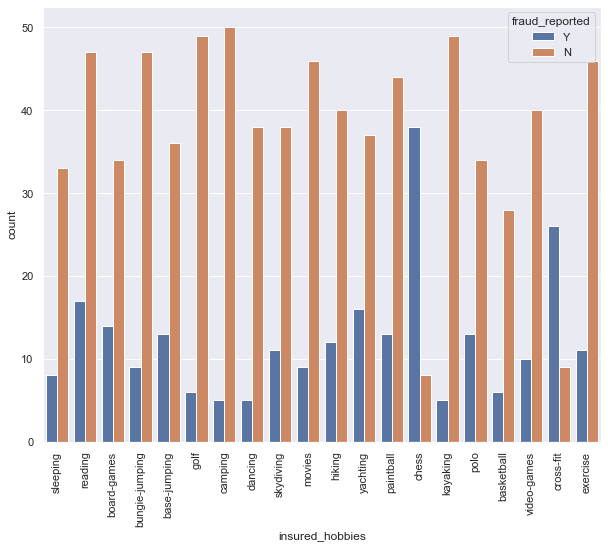

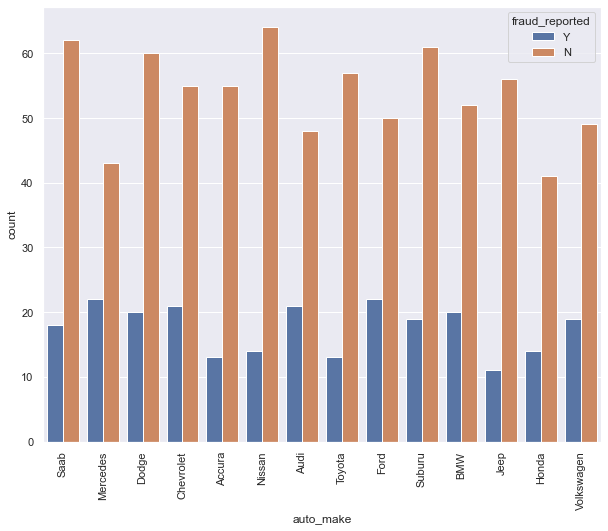

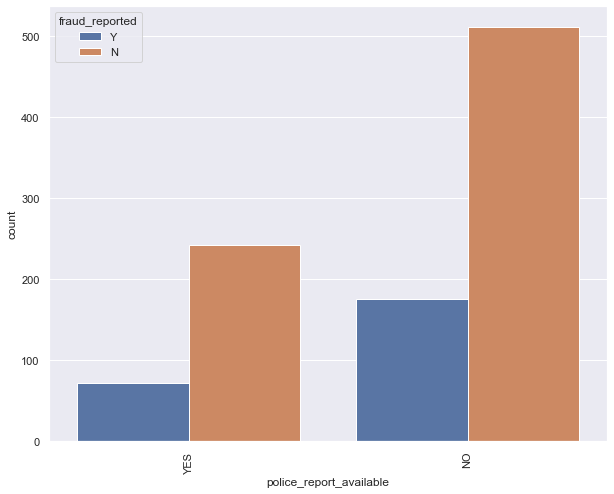

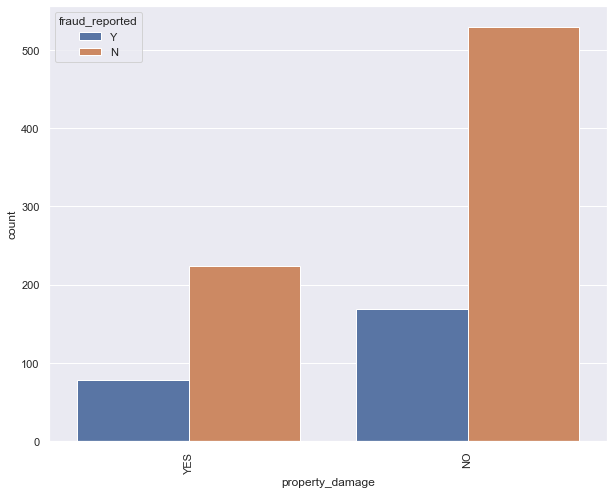

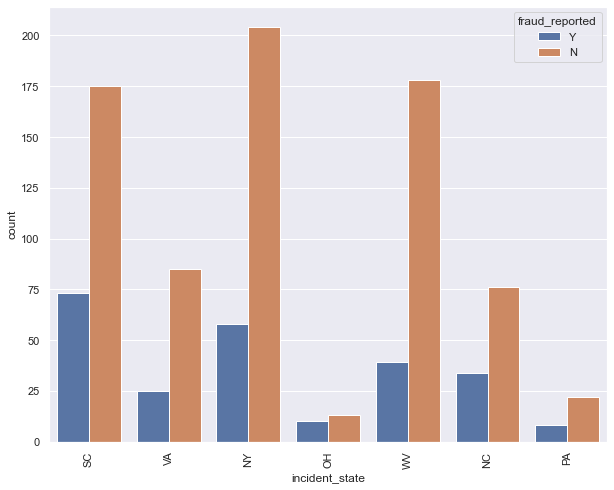

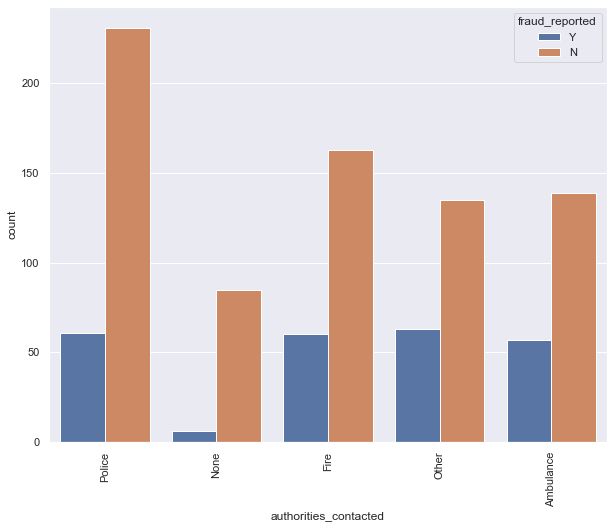

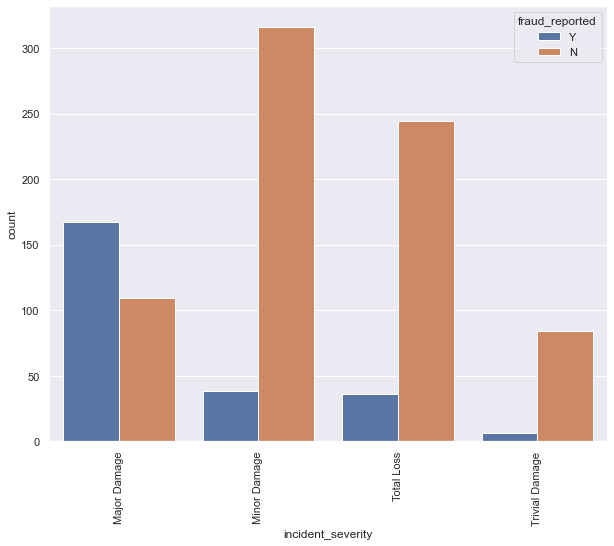

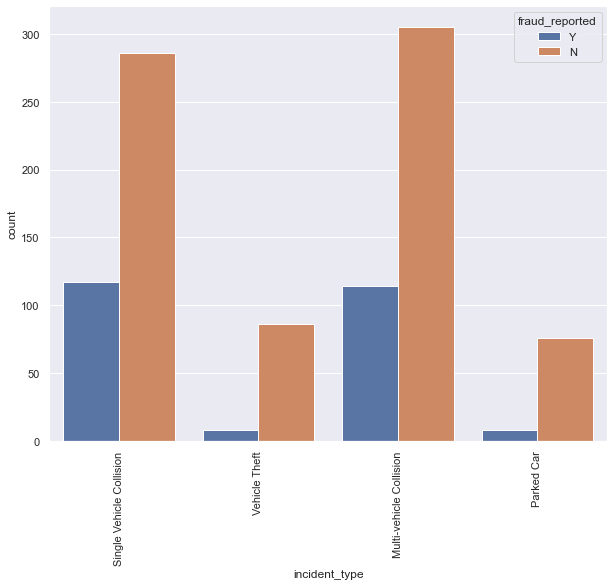

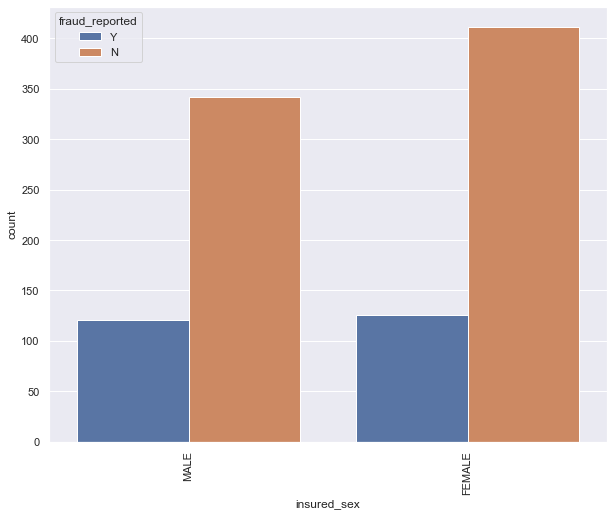

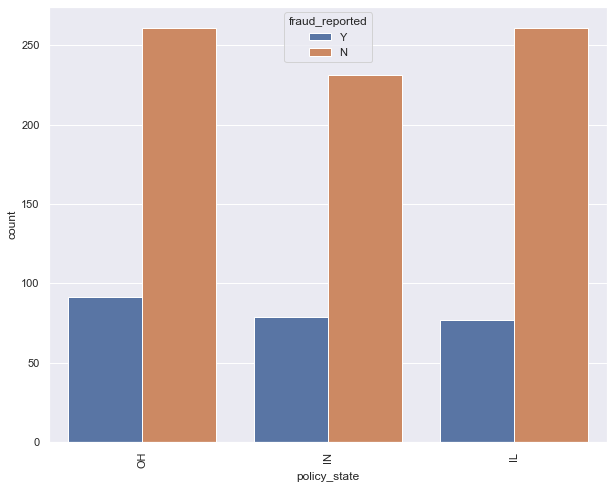

In [24]:
for i in var1:
   
    plotcountgraph(i)

#### Observations:

* Customers who are interested in chess and cross-fit did fraud claim more compared to other customers.


* Customers who made fraud claim less in number  are those who have vehicle of Jeep.Those having Mercedes and Ford did fraud claim more compared to other customers


* Fraud reported maximum for the cases where police report is not available.


* Report of fraud claim is reported maximum in SC.


* Fraud claim is reported in all cases where customers contacted Police,Fire, Ambulance and others.


* Fraud claim is maximum in the case where Major Damage is happend.fraud claim is minimum in the case  where Total Loss is happened.


* Fraud claim is reported in the incident type Single Vehicle Collision and Multi-Vehicle Collision and fraud claim is minimum in the incident-type Vehicle Theft.


* More than Male, Females involved in the fraud claims reported by the company.But Genuine insurance claim is also maximum in the case of females.




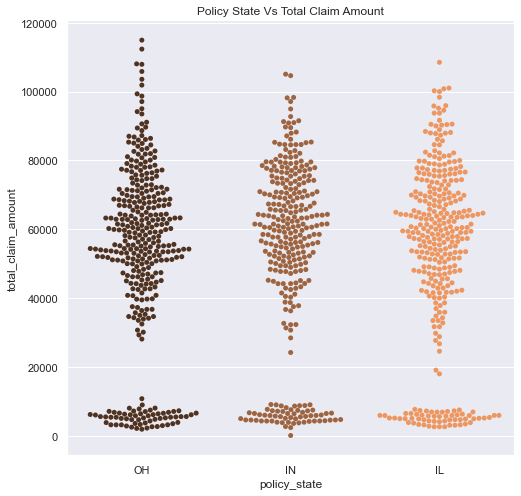

In [25]:
plt.figure(figsize=(8,8))
sns.swarmplot(df['policy_state'],df['total_claim_amount'],palette='copper')
plt.title('Policy State Vs Total Claim Amount')
plt.show()

* Total claim amount is maximum for the policy state OH

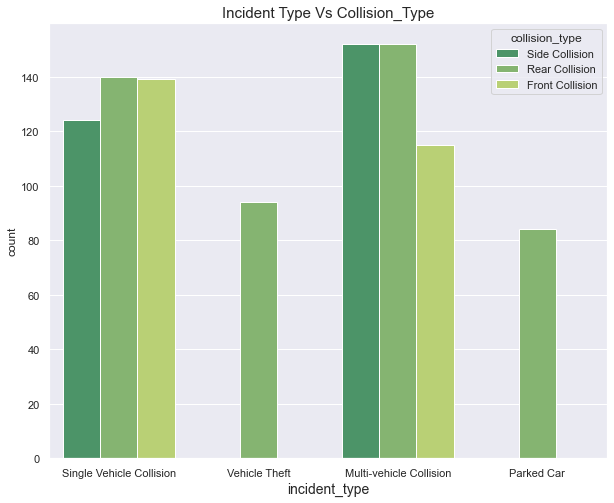

In [26]:
plt.figure(figsize=(10,8))
sns.countplot(x="incident_type",hue="collision_type",data=df,palette='summer')
plt.xlabel("incident_type",size=14)
plt.title("Incident Type Vs Collision_Type",size=15)
plt.show()

* For the incident type Vehicle Thrft and Parked Car only Rear Collision is happened.

* For multi-vehicle-collision Side Collision and Rear Collision is maximum

* For Single-Vehicle-collision Side Collision is minimum in number.

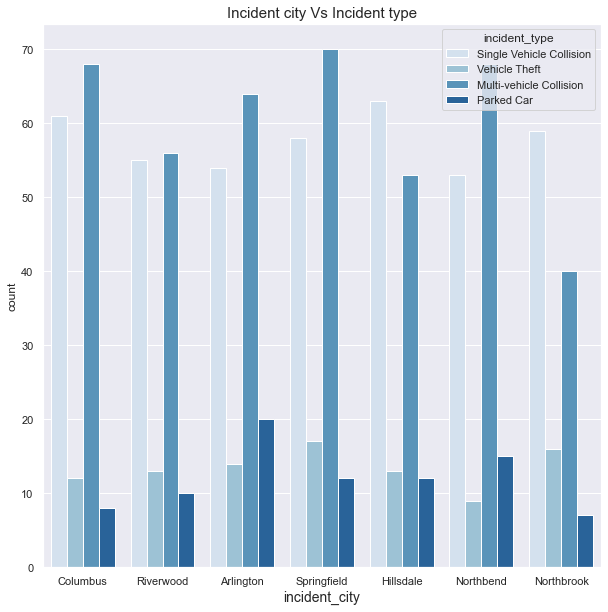

In [27]:
plt.figure(figsize=(10,10))
sns.countplot(x="incident_city",hue="incident_type",data=df,palette='Blues')
plt.xlabel("incident_city",size=14)
plt.title("Incident city Vs Incident type",size=15)
plt.show()

* In most of the cities Multi-Vehicle-Collision is maximum and then Single-Vehicle-Collision is higher in number.

* Vehicle theft and Parked car incidents are less in number.

* Multi-Vehicle-collision is maximum in the city Springfield and minimum in the city Northbrook.

* Single-Vehicle-collision is maximum in the city Hillsdale.

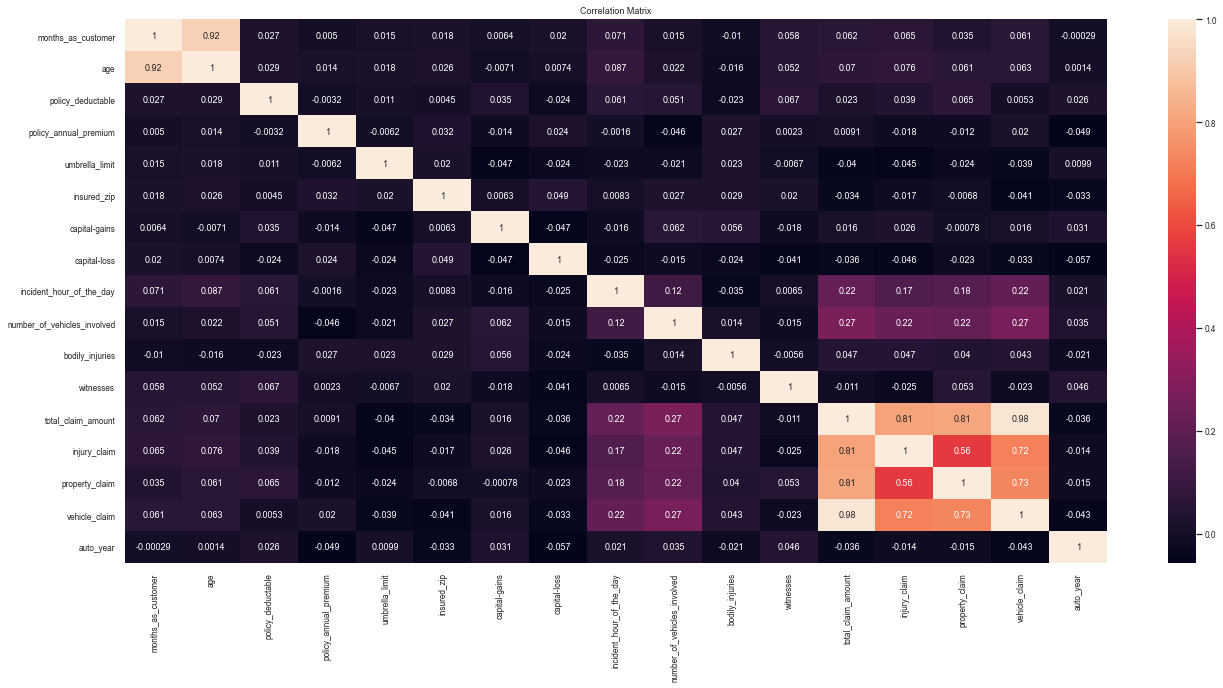

In [28]:
#Multivariate analysis
corr_matrix=df.corr()
plt.figure(figsize=(22,10))
sns.set(font_scale=.75)
sns.heatmap(corr_matrix,annot=True)
plt.title("Correlation Matrix")
plt.show()

* age and months_as_customer are highly correlated.


* injury_claim,property_claim and vehicle_claim have strong correlation with total_claim_amount


* incident_hour_of_the_day  and number_of_vehicles_involved is correlated with total_claim_amount,injury_claim,property_claim,vehicle_claim

## Checking Outliers

In [29]:
df_float=df.select_dtypes(include=[np.number])
df_float

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
0,328,48,1000,1406.91,0,466132,53300,0,5,1,1,2,71610,6510,13020,52080,2004
1,228,42,2000,1197.22,5000000,468176,0,0,8,1,0,0,5070,780,780,3510,2007
2,134,29,2000,1413.14,5000000,430632,35100,0,7,3,2,3,34650,7700,3850,23100,2007
3,256,41,2000,1415.74,6000000,608117,48900,-62400,5,1,1,2,63400,6340,6340,50720,2014
4,228,44,1000,1583.91,6000000,610706,66000,-46000,20,1,0,1,6500,1300,650,4550,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,1000,1310.80,0,431289,0,0,20,1,0,1,87200,17440,8720,61040,2006
996,285,41,1000,1436.79,0,608177,70900,0,23,1,2,3,108480,18080,18080,72320,2015
997,130,34,500,1383.49,3000000,442797,35100,0,4,3,2,3,67500,7500,7500,52500,1996
998,458,62,2000,1356.92,5000000,441714,0,0,2,1,0,1,46980,5220,5220,36540,1998


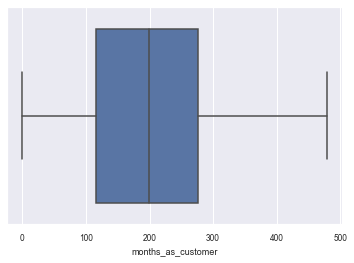

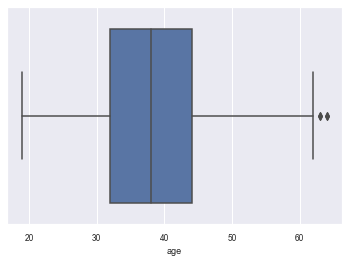

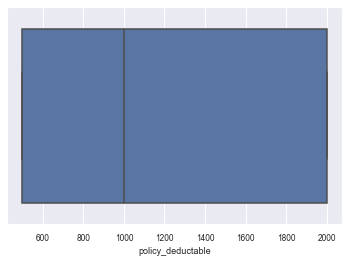

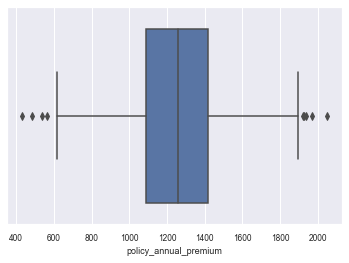

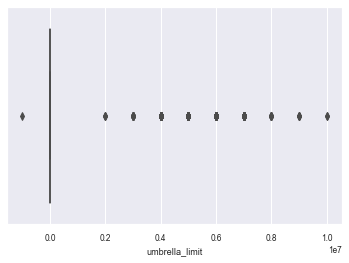

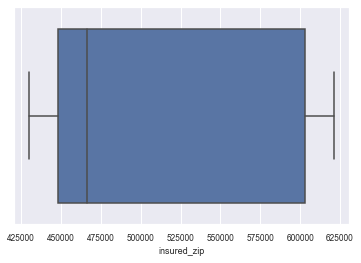

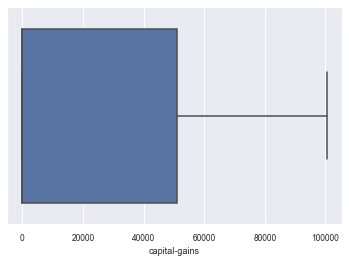

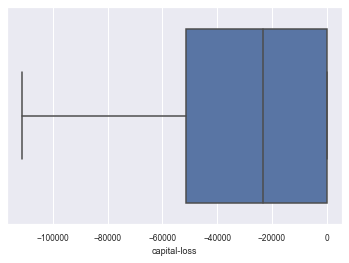

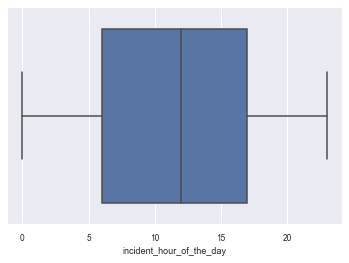

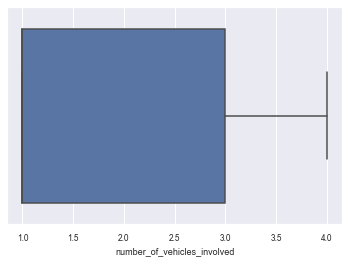

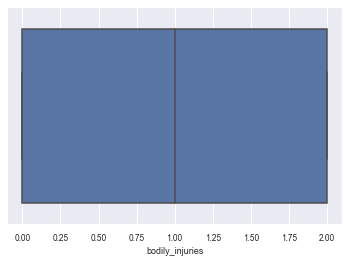

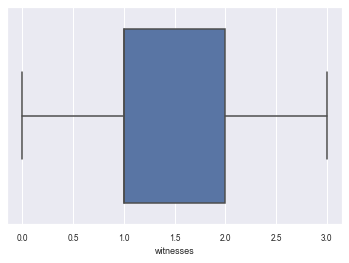

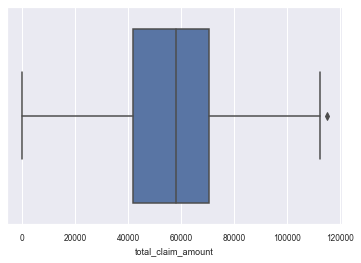

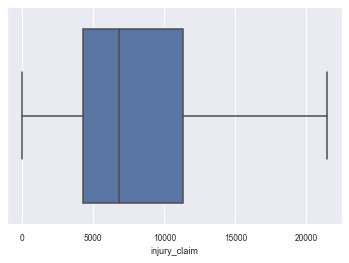

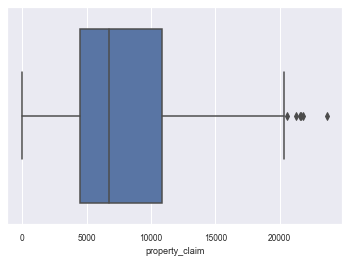

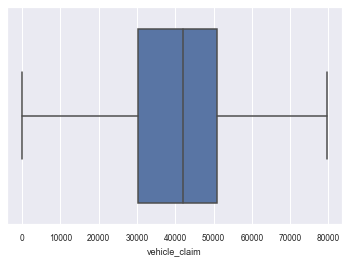

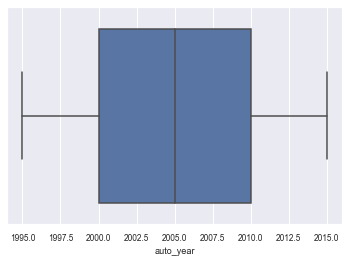

In [30]:
var=['months_as_customer','age','policy_deductable','policy_annual_premium','umbrella_limit','insured_zip','capital-gains','capital-loss','incident_hour_of_the_day','number_of_vehicles_involved','bodily_injuries','witnesses','total_claim_amount','injury_claim','property_claim','vehicle_claim','auto_year']
for i in var:
    sns.boxplot(df_float[i])
    plt.show()

There are  some outliers in the dataset.

z score test

In [31]:
from scipy.stats import zscore
z=np.abs(zscore(df_float))
z

array([[1.07813958, 0.99083647, 0.22238259, ..., 1.16550497, 0.74965272,
        0.1834404 ],
       [0.2089946 , 0.33407345, 1.41278352, ..., 1.37269599, 1.82334593,
        0.31549088],
       [0.60800168, 1.08891308, 1.41278352, ..., 0.73607206, 0.78556451,
        0.31549088],
       ...,
       [0.64276748, 0.54161057, 1.03996564, ..., 0.0208261 , 0.77190224,
        1.5139238 ],
       [2.20802805, 2.52328351, 1.41278352, ..., 0.45197603, 0.07357971,
        1.18130295],
       [2.19064515, 2.3043625 , 0.22238259, ..., 1.34366428, 1.81434017,
        0.31549088]])

In [32]:
threshold=3
print(np.where(z>3))

(array([ 31,  48,  88, 115, 119, 229, 248, 262, 314, 430, 458, 500, 503,
       657, 700, 763, 807, 875, 922, 975], dtype=int64), array([ 4,  4,  4,  4,  4,  3,  3,  4,  4,  4,  4, 14,  4,  4,  4,  3,  7,
        4,  4,  4], dtype=int64))


In [33]:
df=df[(z<3).all(axis=1)]

In [34]:
df.shape

(980, 34)

## Data distribution along columns

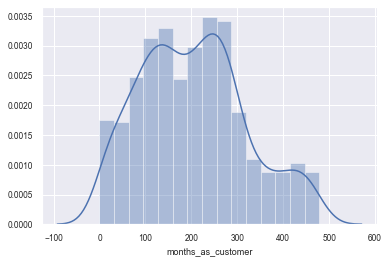

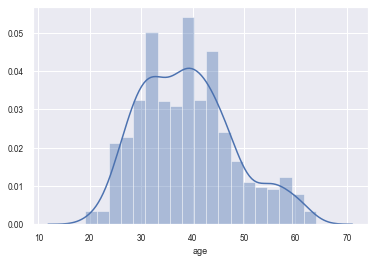

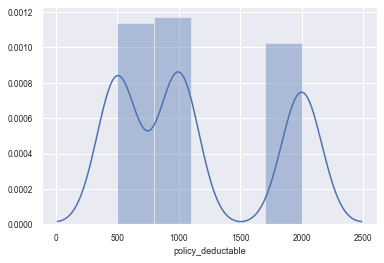

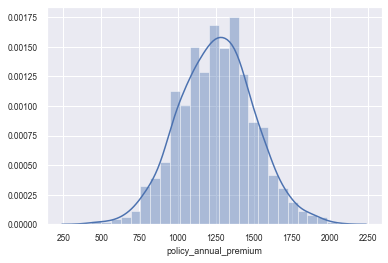

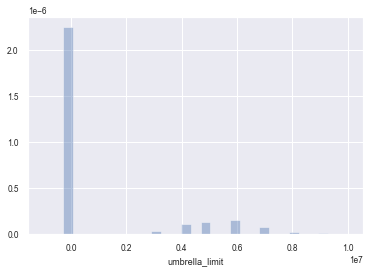

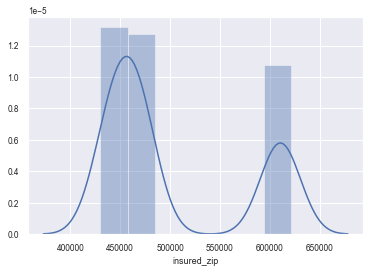

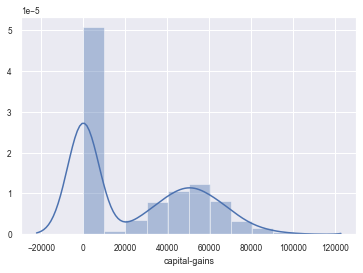

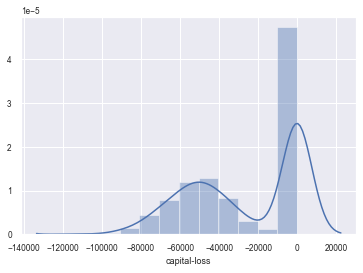

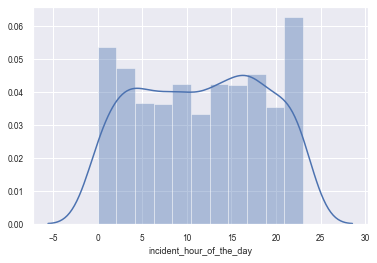

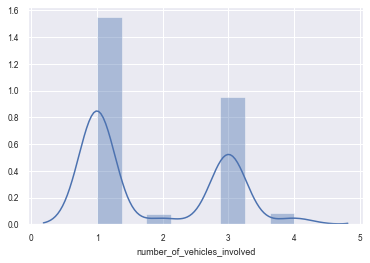

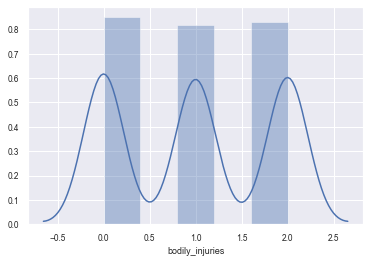

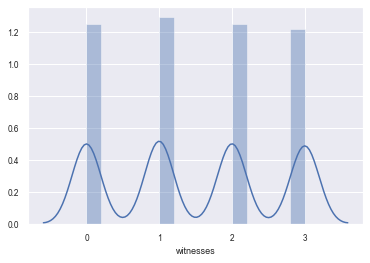

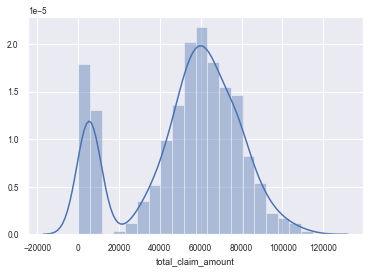

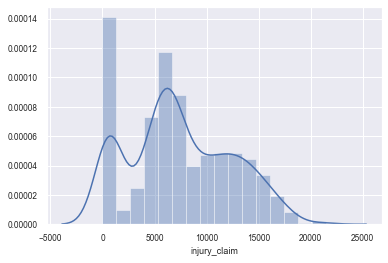

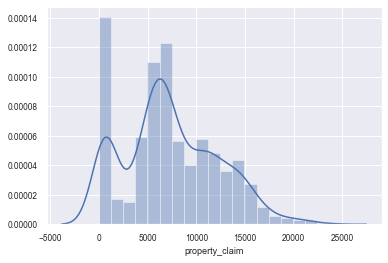

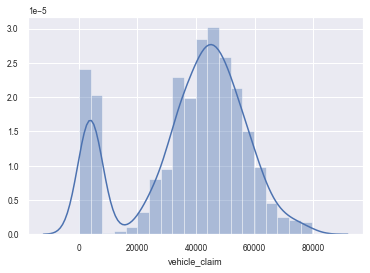

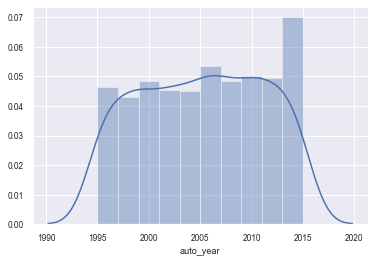

In [35]:
for i in var:
    sns.distplot(df_float[i])
    plt.show()

In [36]:
df_float.skew()

months_as_customer             0.362177
age                            0.478988
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
capital-gains                  0.478850
capital-loss                  -0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.621098
auto_year                     -0.048289
dtype: float64

* There is skewness in the column insured_zip.we will replace it with the power_transform function

### Converting categorical columns into Numerical

In [37]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
list=['insured_sex','fraud_reported','property_damage','police_report_available'] 
for i in list:
    df[i]=le.fit_transform(df[i])

In [38]:
corr_matrix=df.corr()
corr_matrix['fraud_reported'].sort_values(ascending=False)

fraud_reported                 1.000000
vehicle_claim                  0.170782
total_claim_amount             0.163969
property_claim                 0.139101
injury_claim                   0.088812
witnesses                      0.049974
umbrella_limit                 0.044729
number_of_vehicles_involved    0.043535
bodily_injuries                0.039184
property_damage                0.025897
months_as_customer             0.021285
insured_sex                    0.020582
policy_deductable              0.015774
age                            0.013279
insured_zip                    0.009699
incident_hour_of_the_day       0.004326
auto_year                      0.001152
policy_annual_premium         -0.012686
capital-gains                 -0.014993
capital-loss                  -0.017617
police_report_available       -0.023867
Name: fraud_reported, dtype: float64

We are going to drop columns insured_zip,incident_hour_of_the_day,auto_year since they have weak coorelation with fraud_reported.

In [39]:
df.drop(['insured_relationship','insured_zip','incident_hour_of_the_day','auto_year'],axis=1,inplace=True)

In [40]:
df=pd.get_dummies(df,columns=['policy_csl','authorities_contacted','policy_state','auto_make','insured_education_level','insured_occupation','insured_hobbies','incident_type','collision_type','incident_severity','incident_state','incident_city'],prefix=['policy_csl','authorities_contacted','policy_state','auto_make','insured_education_level','insured_occupation','insured_hobbies','incident_type','collision_type','incident_severity','incident_state','incident_city'])
df

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,capital-gains,capital-loss,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported,policy_csl_100/300,policy_csl_250/500,policy_csl_500/1000,authorities_contacted_Ambulance,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,policy_state_IL,policy_state_IN,policy_state_OH,auto_make_Accura,auto_make_Audi,auto_make_BMW,auto_make_Chevrolet,auto_make_Dodge,auto_make_Ford,auto_make_Honda,auto_make_Jeep,auto_make_Mercedes,auto_make_Nissan,auto_make_Saab,auto_make_Suburu,auto_make_Toyota,auto_make_Volkswagen,insured_education_level_Associate,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_adm-clerical,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,insured_occupation_handlers-cleaners,insured_occupation_machine-op-inspct,insured_occupation_other-service,insured_occupation_priv-house-serv,insured_occupation_prof-specialty,insured_occupation_protective-serv,insured_occupation_sales,insured_occupation_tech-support,insured_occupation_transport-moving,insured_hobbies_base-jumping,insured_hobbies_basketball,insured_hobbies_board-games,insured_hobbies_bungie-jumping,insured_hobbies_camping,insured_hobbies_chess,insured_hobbies_cross-fit,insured_hobbies_dancing,insured_hobbies_exercise,insured_hobbies_golf,insured_hobbies_hiking,insured_hobbies_kayaking,insured_hobbies_movies,insured_hobbies_paintball,insured_hobbies_polo,insured_hobbies_reading,insured_hobbies_skydiving,insured_hobbies_sleeping,insured_hobbies_video-games,insured_hobbies_yachting,incident_type_Multi-vehicle Collision,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Front Collision,collision_type_Rear Collision,collision_type_Side Collision,incident_severity_Major Damage,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,incident_state_NC,incident_state_NY,incident_state_OH,incident_state_PA,incident_state_SC,incident_state_VA,incident_state_WV,incident_city_Arlington,incident_city_Columbus,incident_city_Hillsdale,incident_city_Northbend,incident_city_Northbrook,incident_city_Riverwood,incident_city_Springfield
0,328,48,1000,1406.91,0,1,53300,0,1,1,1,2,1,71610,6510,13020,52080,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
1,228,42,2000,1197.22,5000000,1,0,0,1,0,0,0,0,5070,780,780,3510,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
2,134,29,2000,1413.14,5000000,0,35100,0,3,0,2,3,0,34650,7700,3850,23100,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
3,256,41,2000,1415.74,6000000,0,48900,-62400,1,0,1,2,0,63400,6340,6340,50720,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
4,228,44,1000,1583.91,6000000,1,66000,-46000,1,0,0,1,0,6500,1300,650,4550,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [41]:
#seperating independent and target variable in x and y
x=df.drop('fraud_reported',axis=1)
y=df['fraud_reported']

## checking skewness

In [42]:
x.skew()

months_as_customer           0.362608
age                          0.475385
policy_deductable            0.476090
policy_annual_premium        0.035964
umbrella_limit               1.801424
                               ...   
incident_city_Hillsdale      2.056351
incident_city_Northbend      2.009066
incident_city_Northbrook     2.292623
incident_city_Riverwood      2.156257
incident_city_Springfield    1.876495
Length: 108, dtype: float64

## Removing Skewness

In [43]:
from sklearn.preprocessing import power_transform
df_new=power_transform(x)
df_new=pd.DataFrame(df_new,columns=x.columns)

In [44]:
df_new.skew()

months_as_customer          -0.133972
age                         -0.002183
policy_deductable            0.022179
policy_annual_premium       -0.007258
umbrella_limit              -7.932397
                               ...   
incident_city_Hillsdale      2.056351
incident_city_Northbend      2.009066
incident_city_Northbrook     2.292623
incident_city_Riverwood      2.156257
incident_city_Springfield    1.876495
Length: 108, dtype: float64

In [45]:
x=df_new

In [46]:
x

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,capital-gains,capital-loss,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,policy_csl_100/300,policy_csl_250/500,policy_csl_500/1000,authorities_contacted_Ambulance,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,policy_state_IL,policy_state_IN,policy_state_OH,auto_make_Accura,auto_make_Audi,auto_make_BMW,auto_make_Chevrolet,auto_make_Dodge,auto_make_Ford,auto_make_Honda,auto_make_Jeep,auto_make_Mercedes,auto_make_Nissan,auto_make_Saab,auto_make_Suburu,auto_make_Toyota,auto_make_Volkswagen,insured_education_level_Associate,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_adm-clerical,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,insured_occupation_handlers-cleaners,insured_occupation_machine-op-inspct,insured_occupation_other-service,insured_occupation_priv-house-serv,insured_occupation_prof-specialty,insured_occupation_protective-serv,insured_occupation_sales,insured_occupation_tech-support,insured_occupation_transport-moving,insured_hobbies_base-jumping,insured_hobbies_basketball,insured_hobbies_board-games,insured_hobbies_bungie-jumping,insured_hobbies_camping,insured_hobbies_chess,insured_hobbies_cross-fit,insured_hobbies_dancing,insured_hobbies_exercise,insured_hobbies_golf,insured_hobbies_hiking,insured_hobbies_kayaking,insured_hobbies_movies,insured_hobbies_paintball,insured_hobbies_polo,insured_hobbies_reading,insured_hobbies_skydiving,insured_hobbies_sleeping,insured_hobbies_video-games,insured_hobbies_yachting,incident_type_Multi-vehicle Collision,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Front Collision,collision_type_Rear Collision,collision_type_Side Collision,incident_severity_Major Damage,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,incident_state_NC,incident_state_NY,incident_state_OH,incident_state_PA,incident_state_SC,incident_state_VA,incident_state_WV,incident_city_Arlington,incident_city_Columbus,incident_city_Hillsdale,incident_city_Northbend,incident_city_Northbrook,incident_city_Riverwood,incident_city_Springfield
0,1.044541,1.002330,0.063154,0.623999,-0.337086,1.071971,1.028989,1.048516,-0.839387,1.512809,0.094895,0.523536,1.473608,0.720163,0.008582,1.089802,0.758130,-0.737094,1.362770,-0.651474,-0.493614,-0.539604,-0.316050,-0.492015,1.553909,-0.709273,-0.670600,1.347625,-0.266530,-0.273059,-0.275211,-0.289950,-0.294065,-0.27735,-0.241486,-0.264327,-0.264327,-0.292013,3.354102,-0.298142,-0.27735,-0.266530,-0.415029,-0.371768,-0.440075,-0.43511,2.470111,-0.409948,-0.378846,-0.262111,-0.275211,3.551213,-0.28995,-0.236716,-0.239110,-0.316050,-0.279478,-0.275211,-0.306186,-0.255377,-0.289950,-0.28995,-0.27735,-0.226941,-0.189581,-0.221925,-0.246183,-0.241486,-0.221925,-0.189581,-0.206284,-0.248506,-0.236716,-0.234303,-0.239110,-0.243843,-0.241486,-0.219382,-0.262111,-0.229416,4.847680,-0.231869,-0.23911,-0.844563,-0.302182,1.209261,-0.321875,-0.583635,-0.942468,1.621613,1.617478,-0.738743,-0.624557,-0.314093,-0.351928,-0.596207,-0.151540,-0.177705,1.751111,-0.353756,-0.526978,-0.415029,2.380476,-0.406546,-0.413338,-0.375315,-0.392809,-0.43345
1,0.299045,0.427171,1.271808,-0.241075,1.482455,1.071971,-0.986627,1.048516,-0.839387,-0.661022,-1.264943,-1.406436,-0.678606,-1.778146,-1.522095,-1.563723,-1.787485,-0.737094,1.362770,-0.651474,-0.493614,-0.539604,-0.316050,-0.492015,1.553909,-0.709273,1.491202,-0.742046,-0.266530,-0.273059,-0.275211,-0.289950,-0.294065,-0.27735,-0.241486,-0.264327,3.783186,-0.292

## Scaling the Dataset

In [47]:
# we are going to scaling the dataset using Standardscaler

from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)

In [48]:
x

array([[ 1.04454111,  1.0023305 ,  0.06315396, ..., -0.37531516,
        -0.39280934, -0.43344987],
       [ 0.29904549,  0.42717141,  1.27180775, ..., -0.37531516,
         2.54576433, -0.43344987],
       [-0.51581942, -1.13601305,  1.27180775, ..., -0.37531516,
        -0.39280934, -0.43344987],
       ...,
       [-0.55427228, -0.47059792, -1.21521142, ..., -0.37531516,
        -0.39280934, -0.43344987],
       [ 1.90408801,  2.12107486,  1.27180775, ..., -0.37531516,
        -0.39280934, -0.43344987],
       [ 1.89156317,  1.97656406,  0.06315396, ..., -0.37531516,
        -0.39280934, -0.43344987]])

## Finding the Best Random State

In [49]:
maxAccu=0
maxRS=0
for i in range(1,300):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    predrf=LR.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is",maxAccu,"on Random_state",maxRS)

Best accuracy is 0.8826530612244898 on Random_state 205


## Train-Test-Split

In [50]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=205)

In [51]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((784, 108), (196, 108), (784,), (196,))

In [52]:
model=[LogisticRegression(),GaussianNB(),SVC(),DecisionTreeClassifier(),RandomForestClassifier(),GradientBoostingClassifier()]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('For',m,':')
    print('------------------------------------------')
    print('Accuracy Score')
    print(accuracy_score(y_test,predm))
    print('Confusion matrix')
    print(confusion_matrix(y_test,predm))
    print('Classification Report')
    print(classification_report(y_test,predm))
    print('\n')

For LogisticRegression() :
------------------------------------------
Accuracy Score
0.8826530612244898
Confusion matrix
[[134   9]
 [ 14  39]]
Classification Report
              precision    recall  f1-score   support

           0       0.91      0.94      0.92       143
           1       0.81      0.74      0.77        53

    accuracy                           0.88       196
   macro avg       0.86      0.84      0.85       196
weighted avg       0.88      0.88      0.88       196



For GaussianNB() :
------------------------------------------
Accuracy Score
0.6887755102040817
Confusion matrix
[[101  42]
 [ 19  34]]
Classification Report
              precision    recall  f1-score   support

           0       0.84      0.71      0.77       143
           1       0.45      0.64      0.53        53

    accuracy                           0.69       196
   macro avg       0.64      0.67      0.65       196
weighted avg       0.74      0.69      0.70       196



For SVC() :
------

## Cross Validation

In [53]:
for m in model:
    scr=cross_val_score(m,x,y,cv=5)
    print('Cross validation score of',m,'is:')
    print('Score',scr)
    print('Cross validation score',scr.mean())
    print('Standard deviation',scr.std())
    print('\n')

Cross validation score of LogisticRegression() is:
Score [0.82653061 0.80612245 0.80612245 0.87244898 0.85714286]
Cross validation score 0.8336734693877551
Standard deviation 0.026920216241373297


Cross validation score of GaussianNB() is:
Score [0.69897959 0.69897959 0.66326531 0.78571429 0.71938776]
Cross validation score 0.713265306122449
Standard deviation 0.04048333556097423


Cross validation score of SVC() is:
Score [0.84183673 0.80102041 0.78571429 0.85204082 0.83673469]
Cross validation score 0.823469387755102
Standard deviation 0.025530604088156758


Cross validation score of DecisionTreeClassifier() is:
Score [0.78061224 0.78571429 0.74489796 0.82142857 0.84183673]
Cross validation score 0.7948979591836735
Standard deviation 0.03375068450722697


Cross validation score of RandomForestClassifier() is:
Score [0.81632653 0.78571429 0.77040816 0.78571429 0.81122449]
Cross validation score 0.793877551020408
Standard deviation 0.01725666788294669


Cross validation score of Gradi

Since the difference between the accuracy score and cross validation score is minimum for SVC.This is our best model.

## Hyper parameter tuning

In [54]:
# Creating parameter list to pass in GridsearchCV
parameters={'kernel':['linear','poly','rbf','sigmoid'],'degree':[1,10],'gamma':['scale','auto']}

In [55]:
GCV=GridSearchCV(SVC(),parameters,cv=5)

In [56]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'degree': [1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [57]:
GCV.best_params_

{'degree': 1, 'gamma': 'auto', 'kernel': 'poly'}

In [58]:
GCV_pred=GCV.best_estimator_.predict(x_test)

In [59]:
accuracy_score(y_test,GCV_pred)

0.8724489795918368

## Saving Best Model

In [60]:
import pickle
filename='Insuranceclaim_fraud_detection.pkl'
pickle.dump(GCV,open(filename,'wb'))

## Conclusion

In [61]:
loaded_model=pickle.load(open('Insuranceclaim_fraud_detection.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result)

0.8724489795918368


In [62]:
import numpy as np
a=np.array(y_test)
predicted=np.array(GCV.predict(x_test))
df_con=pd.DataFrame({'Original':a,'Predicted':predicted}, index=range(len(a)))

In [63]:
df_con

,Original,Predicted
0,1,1
1,1,1
2,0,0
3,0,0
4,0,0
...,...,...
191,0,0
192,0,0
193,0,0
194,1,1
